In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adv_data = pd.read_csv("Advertising.csv")

In [3]:
adv_data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
adv_data.shape

(200, 4)

In [8]:
len(adv_data)

200

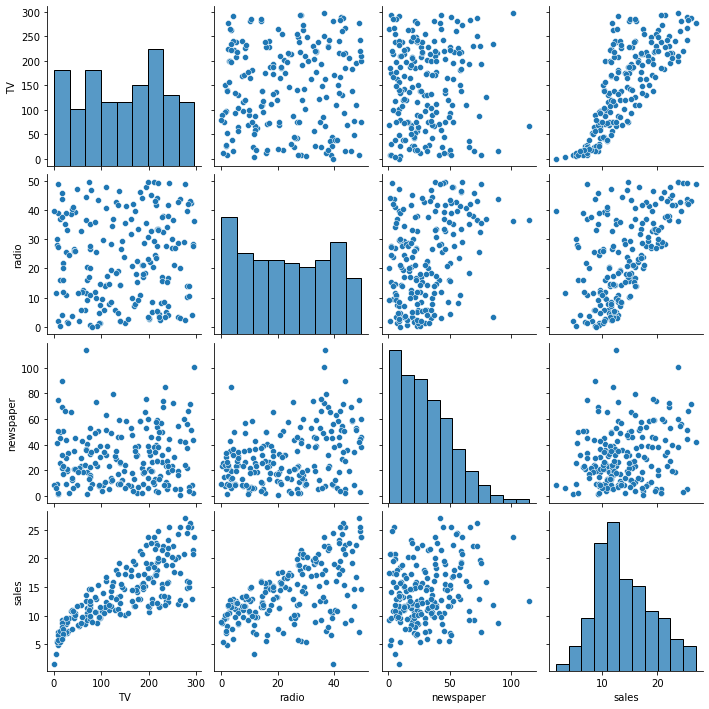

In [13]:
sns.pairplot(data=adv_data)

What we can understand from the above scatterplots is that TV and radio are somewhat related with the "sales" label variable. The newspaper advertising spend seems to be more random
We will try to model a linear regression model for predicting sales value basis TV, radio and newspaper spend

In [9]:
#Features variables
X = adv_data.drop("sales",axis=1)

In [10]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
#Label variable
y = adv_data["sales"]

In [12]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [14]:
#Train test split to train on the training dataset and test on the test dataset
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#help(train_test_split)

In [17]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

140
60
140
60


In [18]:
#Importing linear regression
from sklearn.linear_model import LinearRegression

In [19]:
#Building model
model = LinearRegression()

In [20]:
#Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [21]:
predicted_values = model.predict(X_test)

In [23]:
predicted_values

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [25]:
#These are the coefficients of the model
model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

### Model Equation
y (sales) = 0.04405928 * TV + 0.1992875 * radio + 0.00688245 * newspaper

In [26]:
adv_data['predicted_sales'] = 0.04405928 * adv_data['TV'] + 0.1992875 * adv_data['radio'] + 0.00688245 * adv_data['newspaper']

In [27]:
adv_data.head()

,TV,radio,newspaper,sales,predicted_sales
0,230.1,37.8,69.2,22.1,18.147373
1,44.5,39.3,45.1,10.4,10.103035
2,17.2,45.9,69.3,9.3,10.382070
3,151.5,41.3,58.5,18.5,15.308178
4,180.8,10.8,58.4,12.9,10.520158


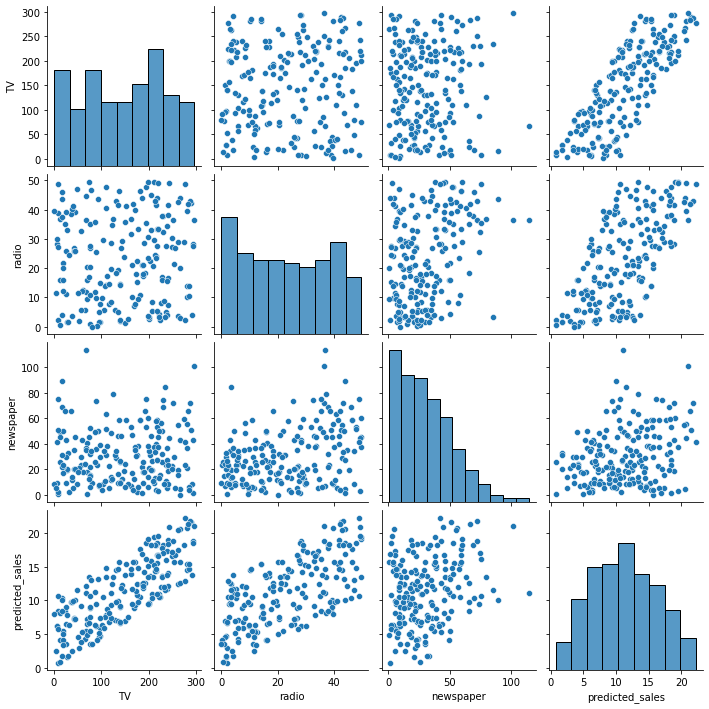

In [29]:
sns.pairplot(adv_data.drop("sales", axis=1))

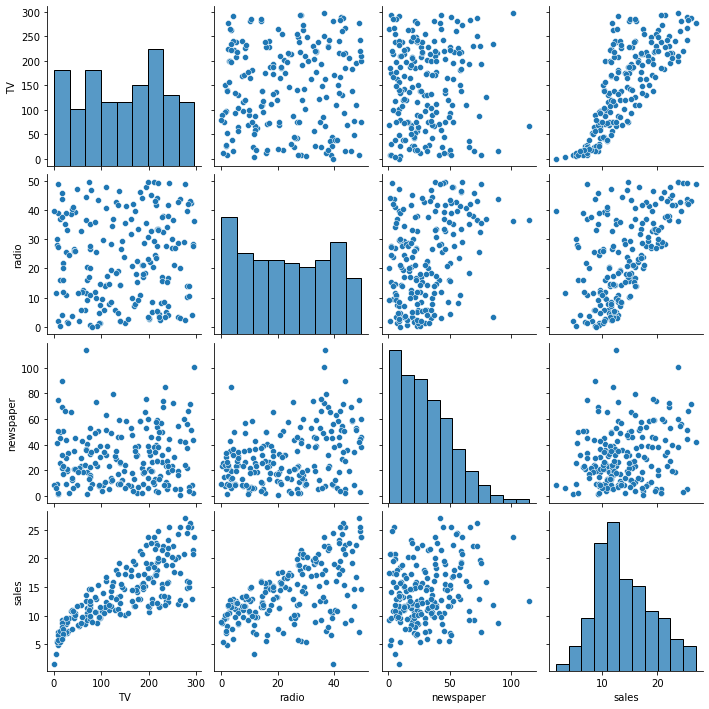

In [31]:
sns.pairplot(adv_data.drop("predicted_sales", axis=1))

In [32]:
#Mean prediction
predicted_values.mean()

12.953488952534398

In [33]:
#Mean value of y
adv_data['sales'].mean()

14.022500000000003

In [34]:
# Performance evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
mean_absolute_error(y_true = y_test, y_pred=predicted_values)

1.5116692224549089

In [37]:
#This is synonymous to variance
mean_squared_error(y_test, predicted_values, squared=True)

3.796797236715219

In [38]:
#This is synonymous to standard deviation
mean_squared_error(y_test, predicted_values, squared=False)

1.9485372043446385

In [40]:
residuals = predicted_values - y_test
#residuals

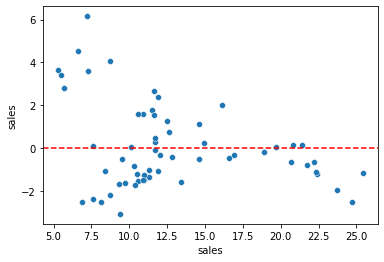

In [49]:
#Residual plot
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='red', linestyle = '--')

There seems to no clear pattern in the residual plot

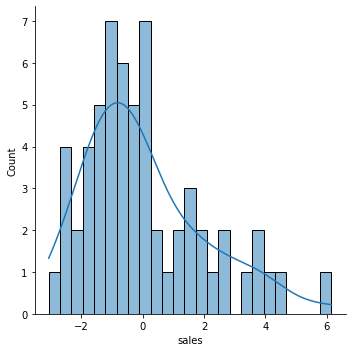

In [45]:
#Ideally residual values should be normally distributed around 0 mean
sns.displot(residuals, bins = 25, kde=True)

The distribution plot looks a little skewed. Can be validated using a normal probability plot

In [52]:
from scipy.stats import probplot

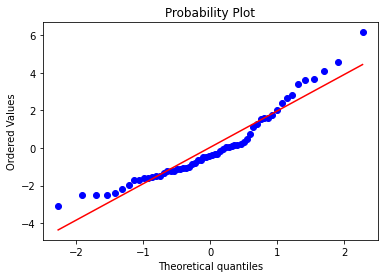

In [56]:
res = probplot(residuals, plot=plt)

Ideally, all the points should be plotted on the red line. 
Ofcourse, real world residuals is not going to be perfectly normally distributed. 
The points looks more or less plotted on the red line.
#### Point to note
Towards the ends, some points really deviate away from the red line.